# Лабораторная работа №1
##  Логистическая регрессия в качестве нейронной сети

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


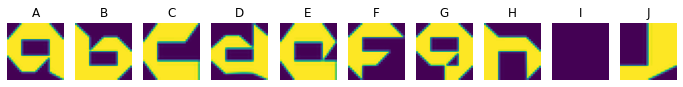

In [2]:
%matplotlib inline

#1.Загрузите данные и отобразите на экране несколько из изображений с помощью языка Python

def loadImages(path):
    data = {}
    for label in os.listdir(f"{path}/"):
        for image in os.listdir(f"{path}/{label}/"):
            try:
                if label not in data:
                    data[label] = []
                data[label].append(mpimg.imread(f"{path}/{label}/{image}").flatten())
            except:
                pass
    return data

data_large = loadImages("large")

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(12, 3))
for ax, images, label in zip(axes, data_large.values(), data_large.keys()):
    ax.set_axis_off()
    ax.imshow(images[0].reshape(28,28))
    ax.set_title(label)

In [3]:
#2. Проверьте, что классы являются сбалансированными, т.е. количество изображений, принадлежащих каждому из классов, примерно одинаково (В данной задаче 10 классов).

min_len = min(map(lambda e: len(e),data_large.values()))
max_len = max(map(lambda e: len(e),data_large.values()))
print("Максимальное кол-во данных:", max_len, "Минимальное кол-во данных", min_len)

data_large = {k: v[:min_len] for k, v in data_large.items()}

Максимальное кол-во данных: 52912 Минимальное кол-во данных 52909


In [4]:
#3. Разделите данные на три подвыборки: обучающую (200 тыс. изображений), валидационную (10 тыс. изображений) и контрольную (тестовую) (19 тыс. изображений);

required_train_size=200000
required_test_size=10000

X = []
y = []
for k, v in data_large.items():
    X = X + v
    y = y + [k]*len(v)

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=required_test_size, train_size=required_train_size)

del X
del y
del data_large

In [5]:
c = 1.1
regression = LogisticRegression(C=c, max_iter=3000, n_jobs=-1, multi_class='multinomial')

regression.fit(X_train, y_train)
predictions = regression.predict(X_test)

print(f"Точность валидационной для с С={c} выборки: {metrics.accuracy_score(y_test, predictions)}")

del X_test
del y_test

Точность валидационной для с С=1.1 выборки: 0.8356


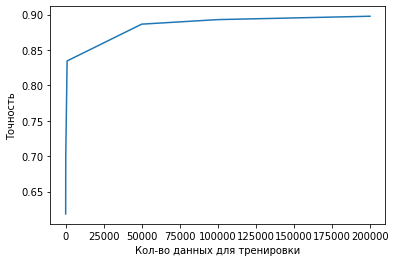

In [6]:
%matplotlib inline

#4. Постройте простейший классификатор (например, с помощью логистической регрессии). Постройте график зависимости точности классификатора от размера обучающей выборки (50, 100, 1000, 50000).

train_numbers = [50, 100, 1000, 50000, 100000, 200000]
accuracy=[]

data_small = loadImages("small")
X = []
y = []
for k, v in data_small.items():
    X = X + v
    y = y + [k]*len(v)

X = np.array(X)
y = np.array(y)

for number in train_numbers:
    regression = LogisticRegression(C=c, max_iter=3000, n_jobs=-1, multi_class='multinomial')
    regression.fit(X_train[:number], y_train[:number])
    predictions = regression.predict(X)
    accuracy.append(metrics.accuracy_score(y, predictions))

plt.plot(train_numbers, accuracy)
plt.xlabel("Кол-во данных для тренировки")
plt.ylabel("Точность")
plt.show()